# Assignment overview <ignore>
The overarching goal of this assignment is to produce a research report in which you implement, analyse, and discuss various Neural Network techniques. You will be guided through the process of producing this report, which will provide you with experience in report writing that will be useful in any research project you might be involved in later in life.

All of your report, including code and Markdown/text, ***must*** be written up in ***this*** notebook. This is not typical for research, but is solely for the purpose of this assignment. Please make sure you change the title of this file so that XXXXXX is replaced by your candidate number. You can use code cells to write code to implement, train, test, and analyse your NNs, as well as to generate figures to plot data and the results of your experiments. You can use Markdown/text cells to describe and discuss the modelling choices you make, the methods you use, and the experiments you conduct. So that we can mark your reports with greater consistency, please ***do not***:

* rearrange the sequence of cells in this notebook.
* delete any cells, including the ones explaining what you need to do.

If you want to add more code cells, for example to help organise the figures you want to show, then please add them directly after the code cells that have already been provided.

Please provide verbose comments throughout your code so that it is easy for us to interpret what you are attempting to achieve with your code. Long comments are useful at the beginning of a block of code. Short comments, e.g. to explain the purpose of a new variable, or one of several steps in some analyses, are useful on every few lines of code, if not on every line. Please do not use the code cells for writing extensive sentences/paragraphs that should instead be in the Markdown/text cells.

# Abstract/Introduction (instructions) - 15 MARKS <ignore>
Use the next Markdown/text cell to write a short introduction to your report. This should include:
* a brief description of the topic (image classification) and of the dataset being used (CIFAR10 dataset). (2 MARKS)
* a brief description of how the CIFAR10 dataset has aided the development of neural network techniques, with examples. (3 MARKS)
* a descriptive overview of what the goal of your report is, including what you investigated. (5 MARKS)
* a summary of your major findings. (3 MARKS)
* two or more relevant references. (2 MARKS)

Image classification is a task that has been well-saturated with various solutions. The best of these solutions usually come in the form of a convolutional neural network [19]. In order assess the performance of these models, the CIFAR10 dataset is often used for benchmarking. It consists of 60000 images total, which all fit into one of 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.<br>
The goal of this report was to investigate the effect that different hyperparameters have on the performance of a CNN for classifying CIFAR10. Specifically, the effect that learning rate [15], dropout [16], and batch normalisation [18] have on the learning curves and gradient flow of the CNN.
It was found that for this particular architecture, learning rate scheduling and dropout did not seem to have the desired effect, whereas batch normalisation showed good improvements to the learning curves and test accuracy.

# Methodology (instructions) - 55 MARKS <ignore>
Use the next cells in this Methodology section to describe and demonstrate the details of what you did, in practice, for your research. Cite at least two academic papers that support your model choices. The overarching prinicple of writing the Methodology is to ***provide sufficient details for someone to replicate your model and to reproduce your results, without having to resort to your code***. You must include at least these components in the Methodology:
* Data - Decribe the dataset, including how it is divided into training, validation, and test sets. Describe any pre-processing you perform on the data, and explain any advantages or disadvantages to your choice of pre-processing.
* Architecture - Describe the architecture of your model, including all relevant hyperparameters. The architecture must include 3 convolutional layers followed by two fully connected layers. Include a figure with labels to illustrate the architecture.
* Loss function - Describe the loss function(s) you are using, and explain any advantages or disadvantages there are with respect to the classification task.
* Optimiser - Describe the optimiser(s) you are using, including its hyperparameters, and explain any advantages or disadvantages there are to using that optimser.
* Experiments - Describe how you conducted each experiment, including any changes made to the baseline model that has already been described in the other Methodology sections. Explain the methods used for training the model and for assessing its performance on validation/test data.


## Data (7 MARKS) <ignore>

The dataset used in these experiments is the CIFAR10 dataset. Its widely used to evaluate the performance of different CNN architectures [5]. It contains 60000 small RGB images of 32x32 dimensions (with 3 colour channels), which all fit into 1 of 10 categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and
truck. To combat overfitting, a selection of augmentation and normalisation techniques were performed on the training images:


*   Augmentation: Random Horizontal Flip, Rotations in range of 0-180
*   Normalisation: Mean normalisation & Standardisation (using CIFAR10 mean & standard deviation)

The augmentation decisions are taken from the paper by Chauhan et al.[1], which is detailed in the architecture section. Regarding normalisation, inspiration was taken from K. K. Pal and K. S. Sundeep [8]. They conducted an experiment into various preprocessing techniques for classification on CIFAR10. While zero-component analysis did perform better in their investigation, it was decided to use mean normalisation and standardisation in this investigation, due to computational limitations. These methods did still produce amicable results in the investigation by Pal et al. [8], even if they were outperformed. For the first and third experiment, the training dataset consists of 40000 images, whereas the validation and test sets consist of 10000 images each whereas, in the second experiment, they were split evenly into 25000 images each. These images are passed through the network in batches of size 32 during training.

## Architecture (17 MARKS) <ignore>

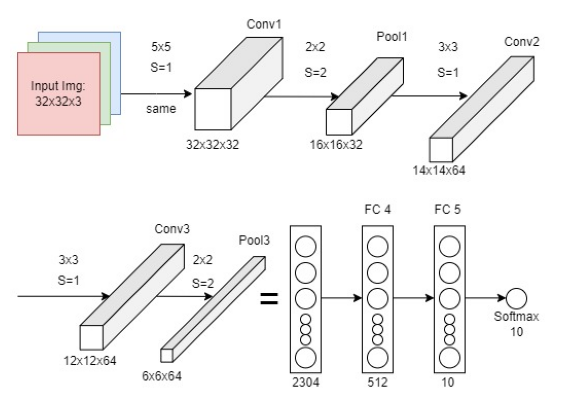

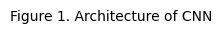

In [ ]:
### Code for Figure 1 ###
import matplotlib.pyplot as plt
# Read in the image
im=plt.imread('Conv diag2.jpg')
# Setup a figure
figureSize = 7
fig = plt.figure(figsize=[figureSize, figureSize])
# Show the image in the figure and remove axes.
plt.imshow(im); plt.axis('off'); plt.show();
# Setup a new figure for the caption.
fig = plt.figure(figsize=[0.01,0.01]); plt.axis('off');
# Write the caption here
captionText = 'Figure 1. Architecture of CNN'
# Show the caption text.
plt.figtext(0.1, 0.1, captionText); plt.show()

Figure 1 shows the architecture of the base model, including the number, size and stride of the filters within each convolutional and pooling layer. The architecture of this convolutional neural network emulates the architecture proposed in a paper by Chauhan, Ghanshala and Joshi [1], in which they evaluated the performance of two CNNs. One was used on the MNIST dataset, and the same dataset as in this investigation: CIFAR10. Regarding the latter, they achieved an accuracy of 80.17% in 50 epochs and a batch size of 32.<br>
Regarding the latter, they chose to pass 32 filters over the input, of a size 5x5 using 'same' padding [13] in the first layer. In their architecture, they repeated this filter 1 more time before moving to 3x3 filters. However, as the architecture in this report contains less convolutions, as well as due to the findings of Khanday et al. [12], 3x3 filters were chosen for the second and third convolutions. The first and third convolutions are also followed by a max pooling layer with 2x2 kernels with a stride of 2.<br>
Finally, the model contains two fully connected layers, the latter having 10 outputs. These outputs are passed through a softmax function, which ensures that the 10 outputs for a given image sum to 1, enabling them to represent the probabilities of said image belonging to each class.

Within this convolutional network, there are 3 main convolutional layers, followed by 2 fully connected layers. Every convolution, along with the first fully connected layer, is followed by a **leaky relu activation function**. Usually, older convolutional networks opt for a standard relu function: <lt>$f(x) = max(0, x)$. While it produces good results, it can suffer from the 'dying relu' problem, in which certain neurons always output 0, therefore never contributing to the learning process as backpropagation can not be performed through the neuron. Leaky ReLU solves this by changing the function slightly: <lt>$f(x) = max(0.01x, x)$. This variation allows there to still be a continuous ouput below 0, which allows for a gradient to be calculated, whilst retaining the advantageous non-linearity of the original relu. Figure 2 shows the leaky relu non-linearity.<br>

<Figure size 700x700 with 0 Axes>

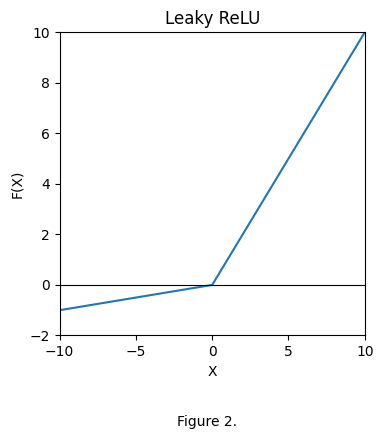

In [ ]:
### Code for Figure 2 ###
import matplotlib.pyplot as plt
figureSize = 7
fig = plt.figure(figsize=[figureSize, figureSize])
x = []
y = []
for i in range(21):
  x.append(i-10)
  y.append(max(0.1*(i-10), i-10))
figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, y)
plt.plot(x, [0 for i in range(len(x))], linewidth=0.8, color=[0,0,0])

### Label the axes
plt.xlabel("X")
plt.ylabel("F(X)")

### Add a title if necessary
plt.title("Leaky ReLU")
ax.set_ylim(ymin=-2, ymax=10)
ax.set_xlim(xmin=-10, xmax=10)

txt="Figure 2."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

As a baseline, each iteration of the model was trained for 15 epochs - the only exceptions being within experiment 1, where they were trained for longer in an attempt to reach a plateau for the learning rates.

## Loss function (3 MARKS) <ignore>

The loss function used in this experiment was cross-entropy loss. This was chosen as a result of the empirical evaluation conducted by Zhang et al. [9], in which they concluded that cross-entropy loss performed the best when performing image classification with a noisy set of labels (CIFAR10).
<lt>$$-\sum_{c=1}^My_{o,c}\log(p_{o,c})$$
*   M - number of classes
*   y - binary indicator(0 or 1) if class label c is the correct observation for observation o
*   p - predicted probability observation o is of class c

As observed in the equation above, loss is calculated for each class individually, then the result must be summed.

## Optimser (4 MARKS) <ignore>

The optimiser used for the model in this investigation is Adam. Originally, RMSProp was implemented as it matches what was used for the original designers of the architecture used in this investigations [1]. Upon testing, RMSProp struggled to perform any gradient descent with a variety of learning rates, so Adam was chosen as it garnered the fastest training speeds as well as respectable model performance. It is generally considered as the best optimiser in the deep learning space. One of its main characteristics is that it can perform comparably even with a static learning rate compared to without, as the results from the first experiment show.

## Experiments <ignore>
### Experiment 1 (8 MARKS)

Experiment 1 was an investigation into learning rate. Part 1 was to test the effectivness of 5 different learning rates. For each learning rate, the model was trained 5 times with a different weight initialisation.
For each learning rate, the mean training and validation loss was calculated every 500 batches, in an attempt to find a plateau.<br>
Finally, to demonstrate the findings and what was achieved, the model with the newly defined learning rate scheduler was plotted against the best performing model that did not have a learning rate scheduler.<br>
Initially, 5 random learning rates were selected between 1e-3 and 1e-2. However, it was quickly found out that these were far to high for descending any gradient in this case. Therefore, different learning rates were tested with until an initial learning rate of 0.0005 (5e-4) was found, which actually allowed the model to learn at all. With this learning rate as a starting point, the next 4 learning rates were incrementally lower. The 5 that were tested were: 5e-4, 1e-4, 5e-5, 3e-5, 1e-5.<br>
Using the learning curves from these learing rates, a learning rate scheduler was designed based on the results, which lowered the learning rate by 1e-5 every 15 epochs.<br>
During training, the models were evaluated using validation data every 500 batches.

### Experiment 2 (8 MARKS) <ignore>

Experiment 2 consisted of two parts. The first was to assess the performance of the model with dropout in the fully connected layers. 5 probabilities of dropout were tested: 0, 0.1, 0.25, 0.5, 0.75. More specifically, the aim was to see the effect of dropout on the each of the models ability to generalise to validation data, as well as classify test data. For this experiment, the training and validation datasets were of equal size.<br>
In the second part of the experiment, the goal was to attempt transfer learning on 2 models. One trained without dropout, along with the best model that was trained with dropout. This was done by freezing all the parameters of the layers in each of the pretrained models apart from those of the fully connected layers, then training said layers on what used to be the validation data.<br>
As the training and validation datasets were of equal size, validation occurred once every epoch.

### Experiment 3 (8 MARKS) <ignore>

Experiment 3 was an investigation into gradient flow, as well as how its impacted by batch normalisation. Part 1 and 2 was to compare the difference in gradient flow between a model with and without dropout. For each model, the mean and standard deviation of the gradient of the parameters at each layer was calculated, for both the first and final 5 episodes of training separately. The mean of these scores across 5 different iterations of each model was calculated, and graphs representing the mean and standard deviation of the gradient for each layer were plotted to visualise the gradient flow through the models.<br>
Part 3 was to again investigate gradient flow on a model with batch normalisation within each hidden layer in the same vain as parts 1 and 2. Then, part 4 was to analyse this batch-normalised model by plotting its learning curves for training and validation data, as well as applying the model to test data.<br>
For these models, validation occurred once every 100 batches.

In [6]:
############################################
### Code for building the baseline model ###
############################################
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import random


class Base_Model(nn.Module):
    def __init__(self):
        super(Base_Model, self).__init__()
        self.net = nn.Sequential(
        nn.Conv2d(3, 32, 5, padding='same'),
        nn.LeakyReLU(),
        nn.MaxPool2d(2, 2),

        nn.Conv2d(32, 64, 3),
        nn.LeakyReLU(),

        nn.Conv2d(64, 64, 3),
        nn.LeakyReLU(),
        nn.MaxPool2d(2, 2),

        nn.Flatten(),
        nn.Linear(2304,512),
        nn.LeakyReLU(),
        nn.Linear(512, 10),
        nn.Softmax(1))

    def forward(self, x):
        for layer in self.net:
            x = layer(x)
        return x

criterion = nn.CrossEntropyLoss()

In [ ]:
###LOAD DATASET###
import torchvision
import torchvision.transforms as transforms

transform = {
    'train':transforms.Compose([
        transforms.RandomRotation((0,180)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.49139968, 0.48215827 ,0.44653124], [0.24703233, 0.24348505, 0.26158768]) #MEAN AND STD NORMALISATION
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.49139968, 0.48215827 ,0.44653124], [0.24703233, 0.24348505, 0.26158768])
    ]),
}

batch_size = 32
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform['train'])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform['test'])
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# Results (instructions) - 55 MARKS <ignore>
Use the Results section to summarise your findings from the experiments. For each experiment, use the Markdown/text cell to describe and explain your results, and use the code cell (and additional code cells if necessary) to conduct the experiment and produce figures to show your results.

### Experiment 1 (17 MARKS) <ignore>

Refering to figure 3 and 4, the average training and validation loss at each time step for each learning rate can be seen. The best performers initially were the learning rates 1e-4 and 5e-4. However, the loss for 5e-4 began to increase just before the 9th epoch. While the other 3 learning rates did not seem to perform as well as 1e-4, none of their learning curves seem to have plateaued. Due to this, 1 more iteration of each of the learning rates were trained, but for 30 epochs each. As you can see from figure 5 and 6, none of the learning rates have plateaued, even after 30 epochs. (NOTE: The minimum of the y-axis was set to 0).<br>
As a final attempt to reach a plateau for the learning rates, models with a learning rate of 1e-4 and 5e-5 were run for 50 epochs each. Due to computational limitations, the remaining learing rates were not attempted for this many epochs.<br>
The plots in figure 7 and 8 show that even after 50 epochs, a plateau has not been reached for either of the learning rates. However, this could be due to the scale of the graphs, as the minimum for the y-axis is 1.8, therefore what looks like a significant decrease in the loss is actually very small. For this reason, a learning rate step-scheduler was designed based on the average time it takes for the learning curves to get close to flattenning i.e. roughly 15 epochs.<br>
As shown in figure 9, the learning rate scheduled model did not perform quite as well as the best model without learning rate scheduling, as it plateaued as soon as the learning rate was changed by the scheduler. This could indicate that either this particular model performs better without it on this particular dataset, or that the defined scheduler was simply not optimal. To further evaluate these two models, their accuracy on test data was calculated. For the learning rate scheduling, accuracy was 44.8%. As for the model without LR scheduling, the accuracy reached 52.6%.

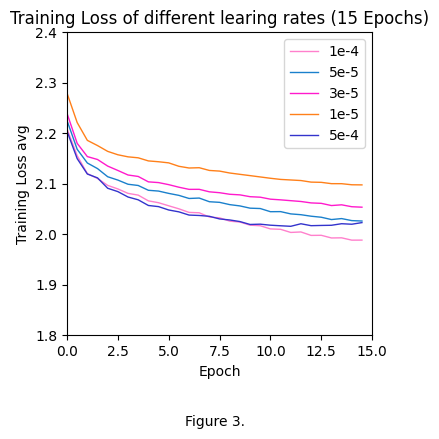

In [11]:
import matplotlib.pyplot as plt

x = []
for i in range(len(tLoss_5e4)):
  x.append(((i)/len(tLoss_5e4))*15) #y axis = epochs

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, tLoss_1e4,linewidth=1.0, color=[1, 0.5, 0.8], label='1e-4')
plt.plot(x, tLoss_5e5,linewidth=1.0, color=[0.1, 0.5, 0.8], label='5e-5')
plt.plot(x, tLoss_3e5,linewidth=1.0, color=[1, 0.1, 0.8], label='3e-5')
plt.plot(x, tLoss_1e5,linewidth=1.0, color=[1, 0.5, 0.1], label='1e-5')
plt.plot(x, tLoss_5e4,linewidth=1.0, color=[0.2, 0.2, 0.8], label='5e-4')

### Label the axes
plt.xlabel("Epoch")
plt.ylabel("Training Loss avg")
plt.legend(loc='upper right')

### Add a title
plt.title("Training Loss of different learing rates (15 Epochs)")
ax.set_ylim(ymin=1.8, ymax=2.4)
ax.set_xlim(xmin=0.0, xmax=15)

txt="Figure 3."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

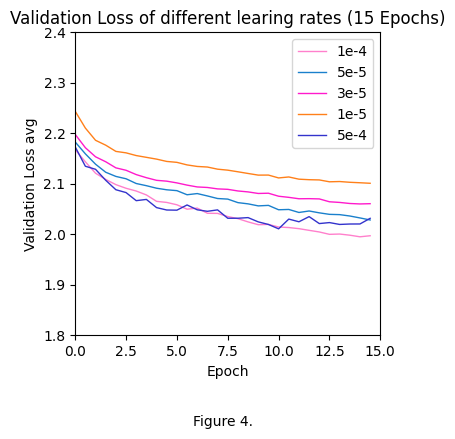

In [12]:
import matplotlib.pyplot as plt

x = []
for i in range(len(vLoss_5e4)):
  x.append(((i)/len(vLoss_5e4))*15) #y axis = epochs

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, vLoss_1e4,linewidth=1.0, color=[1, 0.5, 0.8], label='1e-4')
plt.plot(x, vLoss_5e5,linewidth=1.0, color=[0.1, 0.5, 0.8], label='5e-5')
plt.plot(x, vLoss_3e5,linewidth=1.0, color=[1, 0.1, 0.8], label='3e-5')
plt.plot(x, vLoss_1e5,linewidth=1.0, color=[1, 0.5, 0.1], label='1e-5')
plt.plot(x, vLoss_5e4,linewidth=1.0, color=[0.2, 0.2, 0.8], label='5e-4')

### Label the axes
plt.xlabel("Epoch")
plt.ylabel("Validation Loss avg")
plt.legend(loc='upper right')

### Add a title
plt.title("Validation Loss of different learing rates (15 Epochs)")
ax.set_ylim(ymin=1.8, ymax=2.4)
ax.set_xlim(xmin=0.0, xmax=15)

txt="Figure 4."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

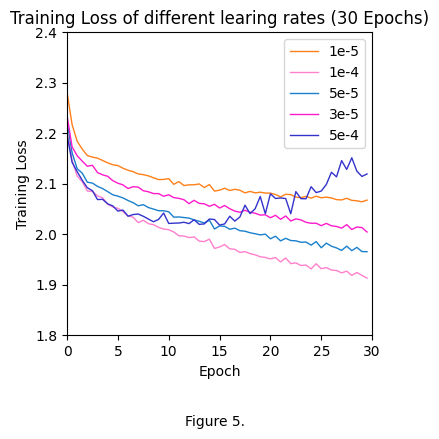

In [13]:
import matplotlib.pyplot as plt
x = []
for i in range(len(e55_30[0])):
  x.append(((i)/len(e55_30[0]))*30) #y axis = epochs

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, e15_30[0],linewidth=1.0, color=[1, 0.5, 0.1], label='1e-5')
plt.plot(x, e14_30[0],linewidth=1.0, color=[1, 0.5, 0.8], label='1e-4')
plt.plot(x, e55_30[0],linewidth=1.0, color=[0.1, 0.5, 0.8], label='5e-5')
plt.plot(x, e35_30[0],linewidth=1.0, color=[1, 0.1, 0.8], label='3e-5')
plt.plot(x, e54_30[0],linewidth=1.0, color=[0.2, 0.2, 0.8], label='5e-4')

### Label the axes
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(loc='upper right')

### Add a title
plt.title("Training Loss of different learing rates (30 Epochs)")
ax.set_ylim(ymin=1.8, ymax=2.4)
ax.set_xlim(xmin=0.0, xmax=30)

txt="Figure 5."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

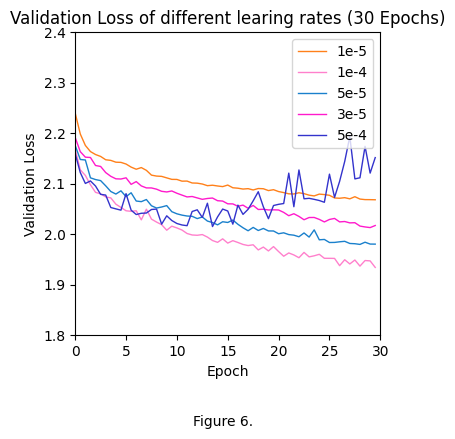

In [15]:
x = []
for i in range(len(e55_30[1])):
  x.append(((i)/len(e55_30[1]))*30) #y axis = epochs

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, e15_30[1],linewidth=1.0, color=[1, 0.5, 0.1], label='1e-5')
plt.plot(x, e14_30[1],linewidth=1.0, color=[1, 0.5, 0.8], label='1e-4')
plt.plot(x, e55_30[1],linewidth=1.0, color=[0.1, 0.5, 0.8], label='5e-5')
plt.plot(x, e35_30[1],linewidth=1.0, color=[1, 0.1, 0.8], label='3e-5')
plt.plot(x, e54_30[1],linewidth=1.0, color=[0.2, 0.2, 0.8], label='5e-4')

### Label the axes
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend(loc='upper right')

### Add a title if necessary
plt.title("Validation Loss of different learing rates (30 Epochs)")
ax.set_ylim(ymin=1.8, ymax=2.4)
ax.set_xlim(xmin=0.0, xmax=30)

txt="Figure 6."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

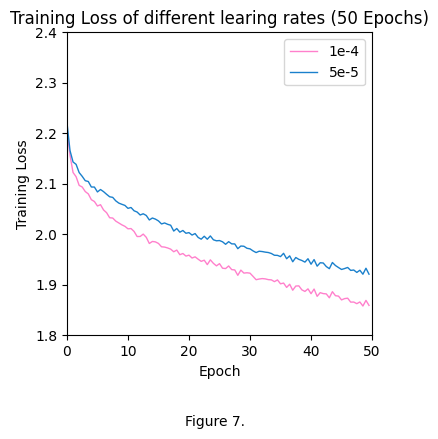

In [16]:
import matplotlib.pyplot as plt
x = []
for i in range(len(e14_50[0])):
  x.append(((i)/len(e14_50[0]))*50) #y axis = epochs

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, e14_50[0],linewidth=1.0, color=[1, 0.5, 0.8], label='1e-4')
plt.plot(x, e55_50[0],linewidth=1.0, color=[0.1, 0.5, 0.8], label='5e-5')

### Label the axes
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(loc='upper right')

### Add a title if necessary
plt.title("Training Loss of different learing rates (50 Epochs)")
ax.set_ylim(ymin=1.8, ymax=2.4)
ax.set_xlim(xmin=0.0, xmax=50)

txt="Figure 7."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

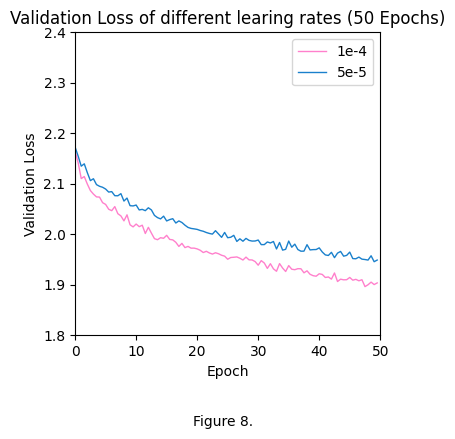

In [17]:
import matplotlib.pyplot as plt
x = []
for i in range(len(e14_50[0])):
  x.append(((i)/len(e14_50[0]))*50) #y axis = epochs

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, e14_50[1],linewidth=1.0, color=[1, 0.5, 0.8], label='1e-4')
plt.plot(x, e55_50[1],linewidth=1.0, color=[0.1, 0.5, 0.8], label='5e-5')

### Label the axes
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend(loc='upper right')

### Add a title if necessary
plt.title("Validation Loss of different learing rates (50 Epochs)")
ax.set_ylim(ymin=1.8, ymax=2.4)
ax.set_xlim(xmin=0.0, xmax=50)

txt="Figure 8."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

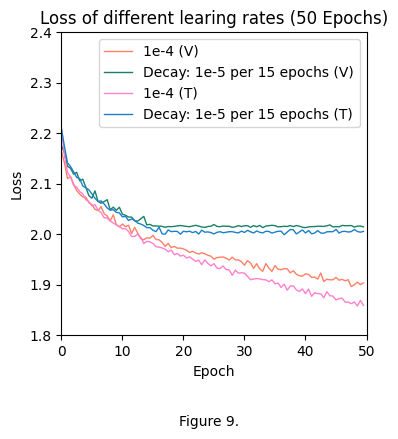

In [18]:
import matplotlib.pyplot as plt
x = []
for i in range(len(e14_50[0])):
  x.append(((i)/len(e14_50[0]))*50) #y axis = epochs

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, e14_50[1],linewidth=1.0, color=[1, 0.5, 0.4], label='1e-4 (V)')
plt.plot(x, scheduled[1],linewidth=1.0, color=[0.1, 0.5, 0.4], label='Decay: 1e-5 per 15 epochs (V)')
plt.plot(x, e14_50[0],linewidth=1.0, color=[1, 0.5, 0.8], label='1e-4 (T)')
plt.plot(x, scheduled[0],linewidth=1.0, color=[0.1, 0.5, 0.8], label='Decay: 1e-5 per 15 epochs (T)')

### Label the axes
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')

### Add a title if necessary
plt.title("Loss of different learing rates (50 Epochs)")
ax.set_ylim(ymin=1.8, ymax=2.4)
ax.set_xlim(xmin=0.0, xmax=50)

txt="Figure 9."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

In [ ]:
#############################
### Code for Experiment 1 ###
#############################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

tdata_exp1, vdata_exp1 = torch.utils.data.random_split(trainset, [40000,10000])
tloader_exp1 = torch.utils.data.DataLoader(tdata_exp1, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
vloader_exp1 = torch.utils.data.DataLoader(vdata_exp1, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

def train_model_exp1(epochs, criterion, tloader, vloader, device, lr, seed, batch_size=batch_size, return_model=True, lr_sch=False):
  torch.manual_seed(seed)
  model = Base_Model()
  model.to(device)
  if lr_sch: #block was added once learning rates had been investigated
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = lr_scheduler.StepLR(optimizer, gamma=1e-5, step_size=15)
  else:
    optimizer = optim.Adam(model.parameters(), lr=lr)
  train_ep_loss = []
  val_ep_loss = []

  for epoch in range(epochs):  # loop over the dataset multiple times
      step_loss = []
      running_loss = 0.0
      model.train()
      for i, data in enumerate(tloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          inputs = inputs.to(device)
          labels = labels.to(device)


          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)
          train_loss = criterion(outputs, labels)
          train_loss.backward()
          optimizer.step()

          # print statistics
          step_loss.append(train_loss.item())
          running_loss += train_loss.item()
          if i % 100 == 99:    # print every 100 batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
              running_loss = 0.0
          if i % 500 == 499:   #every 500 batches i.e. episode perform validation
            train_ep_loss.append(np.array(step_loss).mean())
            step_loss = []
            model.eval()        #set model to evaluation mode
            running_loss = 0.0
            validStep_loss = []
            for i, data in enumerate(vloader, 0):

              inputs, labels = data
              inputs = inputs.to(device)
              labels = labels.to(device)

              outputs = model(inputs)

              valid_loss = criterion(outputs, labels)
              validStep_loss.append(valid_loss.item())
              running_loss += valid_loss.item()
              if i % 25 == 24:    # print every 25 batches
                print(f'[{epoch + 1}, {i + 1:5d}] Validation Loss: {running_loss / 25:.3f}')
                running_loss = 0.0
            val_ep_loss.append(np.array(validStep_loss).mean())
            model.train()
            running_loss = 0.0
      if lr_sch:
        scheduler.step()


  if return_model:
    return model, (train_ep_loss, val_ep_loss)
  else:
    return train_ep_loss, val_ep_loss

In [ ]:
import pickle

#ATTEMPT WITH LEARNING RATE OF 5e-5
dict05 = {}            #dictionary to results of models with 5e-5 learning rate
for i in range(5):
  dict05[f'm{i+1}'] = train_model_exp1(15, criterion, tloader_exp1, vloader_exp1, device, 5e-5, i, return_model = False) #training model 5 times with different seeds
with open('fexp1_dict5e5.pickle', 'wb') as picky:
 pickle.dump(dict05, picky)


In [ ]:
#ATTEMPT WITH LEARNING RATE OF 1e-4
dict1e4 = {}                         #dictionary to results of models with 1e-4 learning rate
for i in range(5):
  dict1e4[f'm{i+1}'] = train_model_exp1(15, criterion, tloader_exp1, vloader_exp1, device, 1e-4, i, return_model=False) #training model 5 times with different seeds
with open('fexp1_dict1e4.pickle', 'wb') as picky:
  pickle.dump(dict1e4, picky)

In [ ]:
#ATTEMPT WITH LEARNING RATE OF 5e-4
dict5e4 = {}                         #dictionary to results of models with 3e-5 learning rate
for i in range(5):
  dict5e4[f'm{i+1}'] = train_model_exp1(15, criterion, tloader_exp1, vloader_exp1, device, 5e-4, i, return_model=False) #training model 5 times with different seeds
with open('fexp1_dict5e4.pickle', 'wb') as picky:
  pickle.dump(dict5e4, picky)

In [ ]:
#ATTEMPT WITH LEARNING RATE OF 1e-5
dict1e5 = {}                         #dictionary to results of models with 1e-5 learning rate
for i in range(5):
  dict1e5[f'm{i+1}'] = train_model_exp1(15, criterion, tloader_exp1, vloader_exp1, device, 1e-5, i, return_model=False) #training model 5 times with different seeds
with open('fexp1_dict1e5.pickle', 'wb') as picky:
  pickle.dump(dict1e5, picky)

In [ ]:
#ATTEMPT WITH LEARNING RATE OF 3e-5
dict3e5 = {}                         #dictionary to results of models with 3e-5 learning rate
for i in range(5):
  dict3e5[f'm{i+1}'] = train_model_exp1(15, criterion, tloader_exp1, vloader_exp1, device, 3e-5, i, return_model=False) #training model 5 times with different seeds
with open('fexp1_dict3e5.pickle', 'wb') as picky:
  pickle.dump(dict3e5, picky)

In [ ]:
e14_30 = train_model_exp1(30, criterion, tloader_exp1, vloader_exp1, device, 1e-4, i, return_model=False)

In [ ]:
e55_30 = train_model_exp1(30, criterion, tloader_exp1, vloader_exp1, device, 5e-5, i, return_model=False)

In [ ]:
e15_30 = train_model_exp1(30, criterion, tloader_exp1, vloader_exp1, device, 1e-5, i, return_model=False)

In [ ]:
e35_30 = train_model_exp1(30, criterion, tloader_exp1, vloader_exp1, device, 3e-5, 0, return_model=False)

In [ ]:
e54_30 = train_model_exp1(30, criterion, tloader_exp1, vloader_exp1, device, 5e-4, 0, return_model=False)

In [ ]:
e14_50 = train_model_exp1(50, criterion, tloader_exp1, vloader_exp1, device, 1e-4, 0, return_model=False)
e55_50 = train_model_exp1(50, criterion, tloader_exp1, vloader_exp1, device, 5e-5, 0, return_model=False)
with open('e55_50.pickle', 'wb') as picky:
  pickle.dump(e55_50, picky)
with open('e14_50.pickle', 'wb') as picky:
  pickle.dump(e14_50, picky)

In [ ]:
f_model, non_scheduled = train_model_exp1(50, criterion, tloader_exp1, vloader_exp1, device, 1e-4, 0)
with open('n_final.pickle', 'wb') as picky:
  pickle.dump(non_scheduled, picky)

In [ ]:
s_model, scheduled = train_model_exp1(50, criterion, tloader_exp1, vloader_exp1, device, 1e-4, 0, lr_sch=True)
with open('final.pickle', 'wb') as picky:
  pickle.dump(scheduled, picky)

In [8]:
import numpy as np

def get_avg_tv_loss(d): #function to get mean loss at each episode
  t = []
  v = []
  for i in range(5):
    t.append(d[f'm{i+1}'][0])
    v.append(d[f'm{i+1}'][1])
  t = np.mean(t, axis=0)
  v = np.mean(v, axis=0)
  return t,v

In [ ]:
with open('e35_30.pickle', 'wb') as picky:
  pickle.dump(e35_30, picky)

with open('e54_30.pickle', 'wb') as picky:
  pickle.dump(e54_30, picky)

In [ ]:
with open('e14_30.pickle','wb') as picky:
  pickle.dump(e14_30, picky)
with open('e55_30.pickle', 'wb') as picky:
  pickle.dump(e55_30, picky)

In [ ]:
with open('e15_30.pickle', 'wb') as picky:
  pickle.dump(e15_30, picky)

In [10]:
###GET MEAN LOSS FOR ALL MODELS
import pickle

with open('fexp1_dict1e4.pickle', 'rb') as picky:
  dict1e4 = pickle.load(picky)
tLoss_1e4, vLoss_1e4 = get_avg_tv_loss(dict1e4)

with open('fexp1_dict5e5.pickle', 'rb') as picky:
  dict5e5 = pickle.load(picky)
tLoss_5e5, vLoss_5e5 = get_avg_tv_loss(dict5e5)

with open('fexp1_dict3e5.pickle', 'rb') as picky:
  dict3e5 = pickle.load(picky)
tLoss_3e5, vLoss_3e5 = get_avg_tv_loss(dict3e5)

with open('fexp1_dict1e5.pickle', 'rb') as picky:
  dict1e5 = pickle.load(picky)
tLoss_1e5, vLoss_1e5 = get_avg_tv_loss(dict1e5)

with open('fexp1_dict5e4.pickle', 'rb') as picky:
  dict5e4 = pickle.load(picky)
tLoss_5e4, vLoss_5e4 = get_avg_tv_loss(dict5e4)

with open('e35_30.pickle', 'rb') as picky:
  e35_30 = pickle.load(picky)

with open('e54_30.pickle', 'rb') as picky:
  e54_30 = pickle.load(picky)

with open('e15_30.pickle', 'rb') as picky:
  e15_30 = pickle.load(picky)

with open('e55_30.pickle', 'rb') as picky:
  e55_30 = pickle.load(picky)

with open('e14_30.pickle', 'rb') as picky:
  e14_30 = pickle.load(picky)

with open('e55_50.pickle', 'rb') as picky:
  e55_50 = pickle.load(picky)

with open('e14_50.pickle', 'rb') as picky:
  e14_50 = pickle.load(picky)

with open('final.pickle', 'rb') as picky:
  scheduled = pickle.load(picky)

with open('n_final.pickle', 'rb') as picky:
  non_scheduled = pickle.load(picky)

In [ ]:
###CODE FOR GETTING ACCURACY ON TEST DATA FOR FINAL TWO MODELS
s_correct = 0
f_correct = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    images = images.to(device)
    s_outputs = s_model(images)
    f_outputs = f_model(images)
    _, s_predicted = torch.max(s_outputs, 1)
    _, f_predicted = torch.max(f_outputs, 1)
    for i in range(len(labels)):
      if s_predicted[i] == labels[i]:
        s_correct+=1
      if f_predicted[i] == labels[i]:
        f_correct+=1
s_acc = s_correct/10000
f_acc = f_correct/10000
print(s_acc)
print(f_acc)

<built-in function len>
0.4482
0.5259


### Experiment 2 (19 MARKS) <ignore>

For the first part of experiment 2, Dropout seemed to have a proportionally negative effect on each model, shown by the trend in the mean performances of each dropout rate in which performance gets worse as it gets higher. These can be seen in figure 10 and 11. Due to this trend, the best model that contained some form of dropout was that with a 10% chance of dropout for each of the fully connected layers, generating a mean accuracy of 43.016% on test data. The model with no dropout demonstrated a mean accuracy of 43.268% on test data.<br>
For the second part of the experiment, the top performers of no dropout and 10% dropout respectively had their parameters frozen other than those within the fully connected layers. Then, the unfrozen parameters were re-initialised so that transfer learning on the validation set could occur. Each model was run 5 times as usual with different initialisations in order to get a mean performance of each.<br>
Figure 12 shows the results of the transfer learning task for both models. As before, the model without dropout performed the best. Interestingly, its mean accuracy on test data increased as a result of the task by 2 percentage points to 45.400%, whereas the iteration with dropout decreased in accuracy by 4 percentage points to 39.840%. Its also worth noting that while the model without dropout performed very similarly on training and validation data, the model with dropout actually performed better on validation data (which the frozen parameters were originally trained on). This could indicate that in this case, adding dropout to the dense layers has in turn reduced generalisability in the convolutional layers of the network.

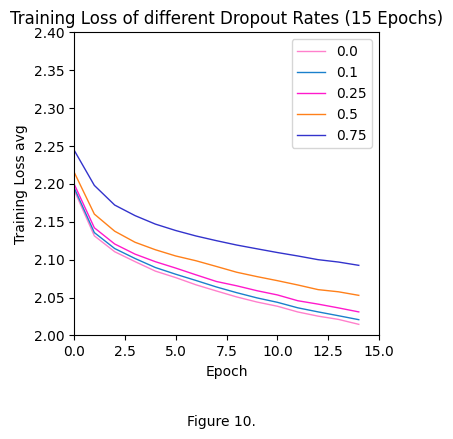

43.268%, 43.016%, 42.824%, 41.642%, 39.206%


In [ ]:
import matplotlib.pyplot as plt

x = []
for i in range(len(tloss0d)):
  x.append(((i)/len(tloss0d))*15) #y axis = epochs

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, tloss0d,linewidth=1.0, color=[1, 0.5, 0.8], label='0.0')
plt.plot(x, tloss01d,linewidth=1.0, color=[0.1, 0.5, 0.8], label='0.1')
plt.plot(x, tloss025d,linewidth=1.0, color=[1, 0.1, 0.8], label='0.25')
plt.plot(x, tloss05d,linewidth=1.0, color=[1, 0.5, 0.1], label='0.5')
plt.plot(x, tloss075d,linewidth=1.0, color=[0.2, 0.2, 0.8], label='0.75')

### Label the axes
plt.xlabel("Epoch")
plt.ylabel("Training Loss avg")
plt.legend(loc='upper right')

### Add a title if necessary
plt.title("Training Loss of different Dropout Rates (15 Epochs)")
ax.set_ylim(ymin=2, ymax=2.4)
ax.set_xlim(xmin=0.0, xmax=15)

txt="Figure 10."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

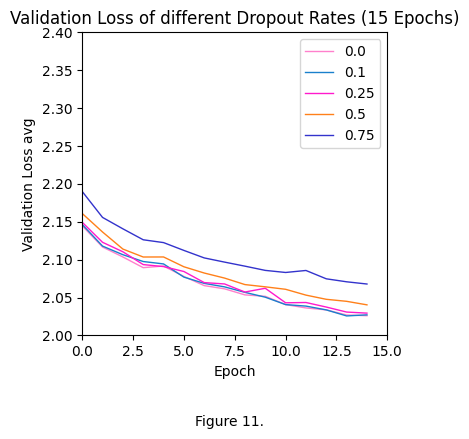

In [ ]:
import matplotlib.pyplot as plt

x = []
for i in range(len(vloss0d)):
  x.append(((i)/len(vloss0d))*15) #y axis = epochs

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, vloss0d,linewidth=1.0, color=[1, 0.5, 0.8], label='0.0')
plt.plot(x, vloss01d,linewidth=1.0, color=[0.1, 0.5, 0.8], label='0.1')
plt.plot(x, vloss025d,linewidth=1.0, color=[1, 0.1, 0.8], label='0.25')
plt.plot(x, vloss05d,linewidth=1.0, color=[1, 0.5, 0.1], label='0.5')
plt.plot(x, vloss075d,linewidth=1.0, color=[0.2, 0.2, 0.8], label='0.75')

### Label the axes
plt.xlabel("Epoch")
plt.ylabel("Validation Loss avg")
plt.legend(loc='upper right')

### Add a title if necessary
plt.title("Validation Loss of different Dropout Rates (15 Epochs)")
ax.set_ylim(ymin=2, ymax=2.4)
ax.set_xlim(xmin=0.0, xmax=15)

txt="Figure 11."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

In [ ]:
print('Performance on test data: (Order of ascdending Dropout rate)')
print(f'{tacc0d * 100:.3f}%, {tacc01d * 100:.3f}%, {tacc025d * 100:.3f}%, {tacc05d * 100:.3f}%, {tacc075d * 100:.3f}%')

Performance on test data: (Order of ascdending Dropout rate)
43.268%, 43.016%, 42.824%, 41.642%, 39.206%


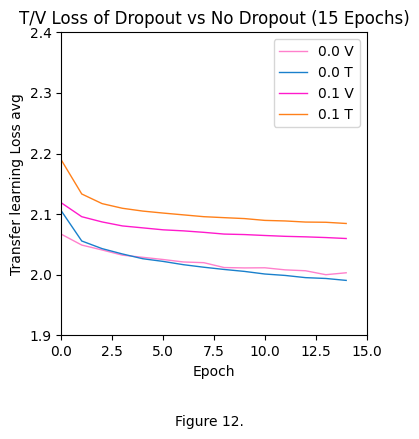

Mean Accuracy of both models on test data:
No Dropout: 45.400%, 0.1 Dropout: 39.840%


In [ ]:
import matplotlib.pyplot as plt

x = []
for i in range(len(tlossf0d)):
  x.append(((i)/len(tlossf0d))*15) #y axis = epochs

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, vlossf0d,linewidth=1.0, color=[1, 0.5, 0.8], label='0.0 V')
plt.plot(x, tlossf0d,linewidth=1.0, color=[0.1, 0.5, 0.8], label='0.0 T')
plt.plot(x, vlossf01d,linewidth=1.0, color=[1, 0.1, 0.8], label='0.1 V')
plt.plot(x, tlossf01d,linewidth=1.0, color=[1, 0.5, 0.1], label='0.1 T')

### Label the axes
plt.xlabel("Epoch")
plt.ylabel("Transfer learning Loss avg")
plt.legend(loc='upper right')

### Add a title if necessary
plt.title("T/V Loss of Dropout vs No Dropout (15 Epochs)")
ax.set_ylim(ymin=1.9, ymax=2.4)
ax.set_xlim(xmin=0.0, xmax=15)

txt="Figure 12."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()
print('Mean Accuracy of both models on test data:')
print(f'No Dropout: {taccf0d*100:.3f}%, 0.1 Dropout: {taccf01d*100:.3f}%')

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tdata_exp2, vdata_exp2 = torch.utils.data.random_split(trainset, [25000,25000])
tloader_exp2 = torch.utils.data.DataLoader(tdata_exp2, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
vloader_exp2 = torch.utils.data.DataLoader(vdata_exp2, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

class Dropout_Model(nn.Module):
    def __init__(self, dropout):
        super(Dropout_Model, self).__init__()
        self.net = nn.Sequential(
        nn.Conv2d(3, 32, 5, padding='same'),
        nn.LeakyReLU(),
        nn.MaxPool2d(2, 2),

        nn.Conv2d(32, 64, 3),
        nn.LeakyReLU(),

        nn.Conv2d(64, 64, 3),
        nn.LeakyReLU(),
        nn.MaxPool2d(2, 2),

        nn.Flatten(),
        nn.Dropout(dropout),
        nn.Linear(2304,512),
        nn.LeakyReLU(),
        nn.Dropout(dropout),
        nn.Linear(512, 10),
        nn.Softmax(1))

    def forward(self, x):
        for layer in self.net:
            x = layer(x)
        return x

In [ ]:
def train_model_exp2(epochs, criterion, tloader, vloader, device, lr, seed, batch_size=batch_size, return_model=True, dropout=0.0, model=None):
  torch.manual_seed(seed)
  if model is None:
    model = Dropout_Model(dropout)
    model.to(device)
  optimizer = optim.Adam(model.parameters(), lr=lr)
  train_ep_loss = []
  val_ep_loss = []

  for epoch in range(epochs):  # loop over the dataset multiple times
      step_loss = []
      running_loss = 0.0
      model.train()
      for i, data in enumerate(tloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          inputs = inputs.to(device)
          labels = labels.to(device)


          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)
          train_loss = criterion(outputs, labels)
          train_loss.backward()
          optimizer.step()

          # print statistics
          step_loss.append(train_loss.item())
          running_loss += train_loss.item()
          if i % 100 == 99:    # print every 100 batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
              running_loss = 0.0
      train_ep_loss.append(np.array(step_loss).mean())
      step_loss = []
      model.eval()
      running_loss = 0.0
      validStep_loss = []
      for i, data in enumerate(vloader, 0):

        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)

        valid_loss = criterion(outputs, labels)
        validStep_loss.append(valid_loss.item())
        running_loss += valid_loss.item()
        if i % 100 == 99:    # print every 100 batches
          print(f'[{epoch + 1}, {i + 1:5d}] Validation Loss: {running_loss / 100:.3f}')
          running_loss = 0.0
      val_ep_loss.append(np.array(validStep_loss).mean())
      running_loss = 0.0


  if return_model:
    return model, (train_ep_loss, val_ep_loss)
  else:
    return train_ep_loss, val_ep_loss

def test_acc(model, tl):
  correct = 0
  with torch.no_grad():
    for data in tl:
      images, labels = data
      images = images.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      for i in range(len(labels)):
        if predicted[i] == labels[i]:
          correct+=1

  return correct/10000

In [ ]:
import pickle
from copy import deepcopy
bestLossList = []
#ATTEMPT WITH DROPOUT 0
dict0d = {}
bestLoss0d = np.inf         #dictionary to results of models with 0 DROPOUT
for i in range(5):
  m, dict0d[f'm{i+1}'] = train_model_exp2(15, criterion, tloader_exp2, vloader_exp2, device, 1e-4, i) #training model 5 times with different seeds
  dict0d[f'm{i+1}'] = [*dict0d[f'm{i+1}'], test_acc(m, testloader)]
  if dict0d[f'm{i+1}'][1][-1] < bestLoss0d:
    bestLoss0d = dict0d[f'm{i+1}'][1][-1]
    model0d = deepcopy(m)

with open('exp2_dict0d.pickle', 'wb') as picky:
 pickle.dump(dict0d, picky)

In [ ]:
#ATTEMPT WITH DROPOUT 0.1
dict01d = {}            #dictionary to results of models with 0.1 DROPOUT
bestLoss01d = np.inf  #best loss variable intialisation
for i in range(5):
  m, dict01d[f'm{i+1}'] = train_model_exp2(15, criterion, tloader_exp2, vloader_exp2, device, 1e-4, i, dropout=0.1) #training model 5 times with different seeds
  dict01d[f'm{i+1}'] = [*dict01d[f'm{i+1}'], test_acc(m, testloader)]
  if dict01d[f'm{i+1}'][1][-1] < bestLoss01d: #check if final loss calculation is lower than previous best
    bestLoss01d = dict01d[f'm{i+1}'][1][-1] #set new best loss
    model01d = deepcopy(m)  #replace new best model

models_d = [model01d]
bestLossList.append(bestLoss01d)
with open('exp2_dict01d.pickle', 'wb') as picky:
 pickle.dump(dict01d, picky)

In [ ]:
#ATTEMPT WITH DROPOUT 0.25
dict025d = {}            #dictionary to results of models with 0.25 DROPOUT
bestLoss025d = np.inf
for i in range(5):
  m, dict025d[f'm{i+1}'] = train_model_exp2(15, criterion, tloader_exp2, vloader_exp2, device, 1e-4, i, dropout=0.25) #training model 5 times with different seeds
  dict025d[f'm{i+1}'] = [*dict025d[f'm{i+1}'], test_acc(m, testloader)]
  if dict025d[f'm{i+1}'][1][-1] < bestLoss025d:
    bestLoss025d = dict025d[f'm{i+1}'][1][-1]
    model025d = deepcopy(m)

models_d.append(model025d)
bestLossList.append(bestLoss025d)
with open('exp2_dict025d.pickle', 'wb') as picky:
 pickle.dump(dict025d, picky)

In [ ]:
#ATTEMPT WITH DROPOUT 0.5
dict05d = {}            #dictionary to results of models with 0.5 DROPOUT
bestLoss05d = np.inf
for i in range(5):
  m, dict05d[f'm{i+1}'] = train_model_exp2(15, criterion, tloader_exp2, vloader_exp2, device, 1e-4, i, dropout=0.5) #training model 5 times with different seeds
  dict05d[f'm{i+1}'] = [*dict05d[f'm{i+1}'], test_acc(m, testloader)]
  if dict05d[f'm{i+1}'][1][-1] < bestLoss05d:
    bestLoss05d = dict05d[f'm{i+1}'][1][-1]
    model05d = deepcopy(m)

models_d.append(model05d)
bestLossList.append(bestLoss05d)
with open('exp2_dict05d.pickle', 'wb') as picky:
 pickle.dump(dict05d, picky)

In [ ]:
#ATTEMPT WITH DROPOUT 0.75
dict075d = {}            #dictionary to results of models with 0.75 DROPOUT
bestLoss075d = np.inf
for i in range(5):
  m, dict075d[f'm{i+1}'] = train_model_exp2(15, criterion, tloader_exp2, vloader_exp2, device, 1e-4, i, dropout=0.75) #training model 5 times with different seeds
  dict075d[f'm{i+1}'] = [*dict075d[f'm{i+1}'], test_acc(m, testloader)]
  if dict075d[f'm{i+1}'][1][-1] < bestLoss075d:
    bestLoss075d = dict075d[f'm{i+1}'][1][-1]
    model075d = deepcopy(m)

models_d.append(model075d)
bestLossList.append(bestLoss075d)
with open('exp2_dict075d.pickle', 'wb') as picky:
 pickle.dump(dict075d, picky)

In [ ]:
bl = np.inf
ind = -1
for l in range(len(bestLossList)):  #check which model is best out of all
  if bestLossList[l] < bl:
    ind = l
    bestLossList[l] = bl

bestModel = models_d[l]   #save model for transfer learning
with open('best_model.pickle', 'wb') as picky:
  pickle.dump(bestModel, picky)


In [ ]:
with open('nd_bm.pickle', 'wb') as picky:
  pickle.dump(model0d, picky)

In [ ]:
def get_avg_tv_loss2(d): #function to get mean loss at each episode, and mean test accuracy
  t = []
  v = []
  te = []
  for i in range(5):
    t.append(d[f'm{i+1}'][0])
    v.append(d[f'm{i+1}'][1])
    te.append(d[f'm{i+1}'][2])
  t = np.mean(t, axis=0)
  v = np.mean(v, axis=0)
  te = np.mean(te)
  return t,v,te

In [ ]:
tloss0d, vloss0d, tacc0d = get_avg_tv_loss2(dict0d)
tloss01d, vloss01d, tacc01d = get_avg_tv_loss2(dict01d)
tloss025d, vloss025d, tacc025d = get_avg_tv_loss2(dict025d)
tloss05d, vloss05d, tacc05d = get_avg_tv_loss2(dict05d)
tloss075d, vloss075d, tacc075d = get_avg_tv_loss2(dict075d)

In [ ]:
import pickle
with open('nd_bm.pickle', 'rb') as picky:
  model0d = pickle.load(picky)
with open('best_model.pickle', 'rb') as picky:
  bestModel = pickle.load(picky)

In [ ]:
####SECOND PART BEGIN####
#Freeze parameters of best models
for layer in model0d.net[:-5]:
  for param in layer.parameters():
    param.requires_grad = False

for layer in bestModel.net[:-5]:
  for param in layer.parameters():
    param.requires_grad = False

In [ ]:
#reset parameters of unfrozen layers
for layer in model0d.net[-5:]:
  if hasattr(layer, 'reset_parameters'):
    layer.reset_parameters()

for layer in bestModel.net[-5:]:
  if hasattr(layer, 'reset_parameters'):
    layer.reset_parameters()

In [ ]:
#ATTEMPT WITH DROPOUT 0
f_dict0d = {}
f_bestLoss0d = np.inf         #dictionary to results of models with 0 DROPOUT

for i in range(5):
  for layer in model0d.net[-5:]: #get new initialisation each run
    if hasattr(layer, 'reset_parameters'):
      layer.reset_parameters()                                         #swapped validation loaderd and test loader so that they are used for the opposite purpose
  m, f_dict0d[f'm{i+1}'] = train_model_exp2(15, criterion, vloader_exp2, tloader_exp2, device, 1e-4, i, model=deepcopy(model0d)) #training model 5 times with different seeds
  f_dict0d[f'm{i+1}'] = [*f_dict0d[f'm{i+1}'], test_acc(m, testloader)]
  if f_dict0d[f'm{i+1}'][1][-1] < f_bestLoss0d:
    f_bestLoss0d = f_dict0d[f'm{i+1}'][1][-1]
    f_model0d = deepcopy(m)

with open('exp2_f_dict0d.pickle', 'wb') as picky:
 pickle.dump(f_dict0d, picky)
with open('f_model0d.pickle','wb') as picky:
  pickle.dump(f_model0d, picky)

In [ ]:
from copy import deepcopy
#ATTEMPT WITH DROPOUT 0.1
f_dict01d = {}            #dictionary to results of models with 0.1 DROPOUT
f_bestLoss01d = np.inf

for i in range(5):
  for layer in bestModel.net[-5:]:#get new initialisation
    if hasattr(layer, 'reset_parameters'):
      layer.reset_parameters()
  m, f_dict01d[f'm{i+1}'] = train_model_exp2(15, criterion, vloader_exp2, tloader_exp2, device, 1e-4, i, dropout=0.1, model=deepcopy(bestModel)) #training model 5 times with different seeds
  f_dict01d[f'm{i+1}'] = [*f_dict01d[f'm{i+1}'], test_acc(m, testloader)]
  if f_dict01d[f'm{i+1}'][1][-1] < f_bestLoss01d:
    f_bestLoss01d = f_dict01d[f'm{i+1}'][1][-1]
    f_model01d = deepcopy(m)

with open('exp2_f_dict01d.pickle', 'wb') as picky:
 pickle.dump(f_dict01d, picky)
with open('f_model01d.pickle', 'wb') as picky:
  pickle.dump(f_model01d, picky)

In [ ]:
import pickle
with open('exp2_f_dict0d.pickle', 'rb') as picky:
  f_dict0d = pickle.load(picky)

with open('exp2_f_dict01d.pickle', 'rb') as picky:
  f_dict01d = pickle.load(picky)

tlossf0d, vlossf0d, taccf0d = get_avg_tv_loss2(f_dict0d)
tlossf01d, vlossf01d, taccf01d = get_avg_tv_loss2(f_dict01d)

### Experiment 3 (19 MARKS) <ignore>

Regarding part 1 & 2 of the experiment, the gradient flows of the models with and without dropout are shown in figure 13 and 14. From these plots, its clear that both models are suffering from severe exploding gradients, which worsens during training as shown by the increased severity shown in figure 14 compared to 13. In comparison to each other, the gradient flow of both models look mostly similar.
The model implemented with Batch Normalisation seemed to slightly remedy the problem, although it was still very prominent. The gradient clearly still explodes towards the initial layers, but just not as severely. As for the learning curves of this model, it definitely performs the best out of all the models tested in this report, reaching an average training and validation loss just below 1.9. On test accuracy, it reached 54.806%, which is the best this report has seen.

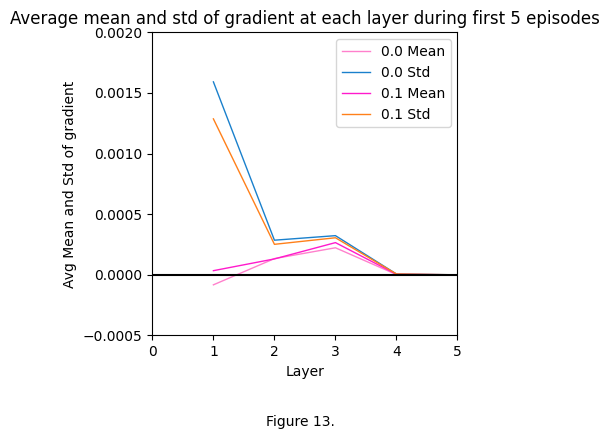

In [ ]:
import matplotlib.pyplot as plt

x = [i+1 for i in range (5)]

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, m0d_s,linewidth=1.0, color=[1, 0.5, 0.8], label='0.0 Mean')
plt.plot(x, std0d_s,linewidth=1.0, color=[0.1, 0.5, 0.8], label='0.0 Std')
plt.plot(x, m01d_s,linewidth=1.0, color=[1, 0.1, 0.8], label='0.1 Mean')
plt.plot(x, std01d_s,linewidth=1.0, color=[1, 0.5, 0.1], label='0.1 Std')
plt.plot([i for i in range(6)], [0 for i in range(6)], color=[0,0,0])

### Label the axes
plt.xlabel("Layer")
plt.ylabel("Avg Mean and Std of gradient")
plt.legend(loc='upper right')

### Add a title if necessary
plt.title("Average mean and std of gradient at each layer during first 5 episodes")
ax.set_ylim(ymin=-0.0005, ymax=0.002)
ax.set_xlim(xmin=0.0, xmax=5)

txt="Figure 13."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

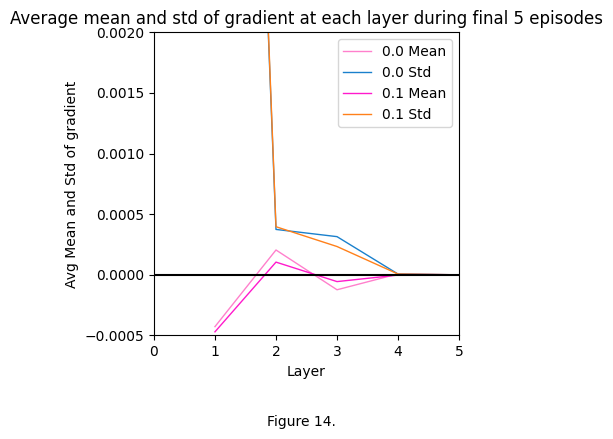

In [ ]:
import matplotlib.pyplot as plt

x = [i+1 for i in range (5)]

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, m0d_e,linewidth=1.0, color=[1, 0.5, 0.8], label='0.0 Mean')
plt.plot(x, std0d_e,linewidth=1.0, color=[0.1, 0.5, 0.8], label='0.0 Std')
plt.plot(x, m01d_e,linewidth=1.0, color=[1, 0.1, 0.8], label='0.1 Mean')
plt.plot(x, std01d_e,linewidth=1.0, color=[1, 0.5, 0.1], label='0.1 Std')
plt.plot([i for i in range(6)], [0 for i in range(6)], color=[0,0,0])

### Label the axes
plt.xlabel("Layer")
plt.ylabel("Avg Mean and Std of gradient")
plt.legend(loc='upper right')

### Add a title if necessary
plt.title("Average mean and std of gradient at each layer during final 5 episodes")
ax.set_ylim(ymin=-0.0005, ymax=0.002)
ax.set_xlim(xmin=0.0, xmax=5)

txt="Figure 14."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

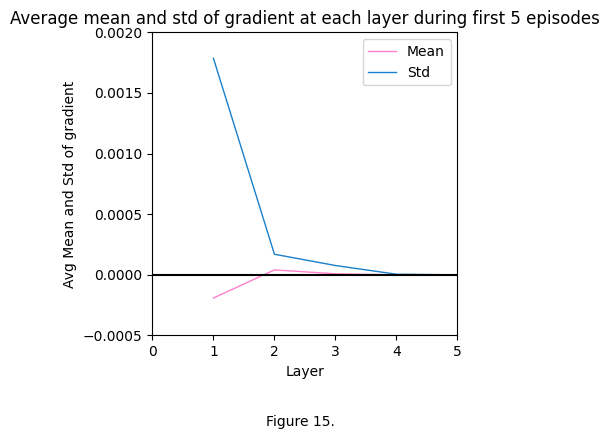

In [ ]:
import matplotlib.pyplot as plt

x = [i+1 for i in range (5)]

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, batch_m_s,linewidth=1.0, color=[1, 0.5, 0.8], label='Mean')
plt.plot(x, batch_std_s,linewidth=1.0, color=[0.1, 0.5, 0.8], label='Std')
plt.plot([i for i in range(6)], [0 for i in range(6)], color=[0,0,0])

### Label the axes
plt.xlabel("Layer")
plt.ylabel("Avg Mean and Std of gradient")
plt.legend(loc='upper right')

### Add a title if necessary
plt.title("Average mean and std of gradient at each layer during first 5 episodes")
ax.set_ylim(ymin=-0.0005, ymax=0.002)
ax.set_xlim(xmin=0.0, xmax=5)

txt="Figure 15."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

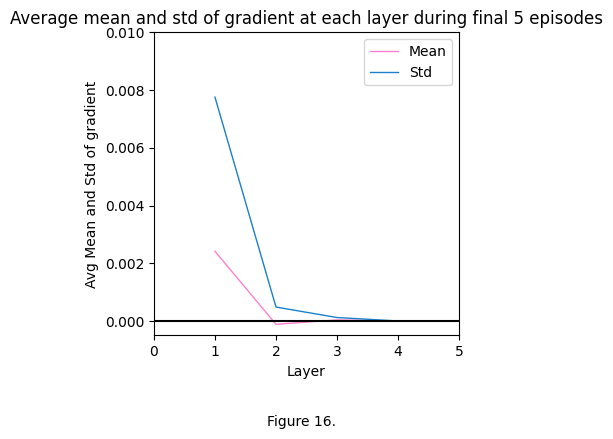

In [ ]:
import matplotlib.pyplot as plt

x = [i+1 for i in range (5)]

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(x, batch_m_e,linewidth=1.0, color=[1, 0.5, 0.8], label='Mean')
plt.plot(x, batch_std_e,linewidth=1.0, color=[0.1, 0.5, 0.8], label='Std')
plt.plot([i for i in range(6)], [0 for i in range(6)], color=[0,0,0])

### Label the axes
plt.xlabel("Layer")
plt.ylabel("Avg Mean and Std of gradient")
plt.legend(loc='upper right')

### Add a title if necessary
plt.title("Average mean and std of gradient at each layer during final 5 episodes")
ax.set_ylim(ymin=-0.0005, ymax=0.02)
ax.set_xlim(xmin=0.0, xmax=5)

txt="Figure 16."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

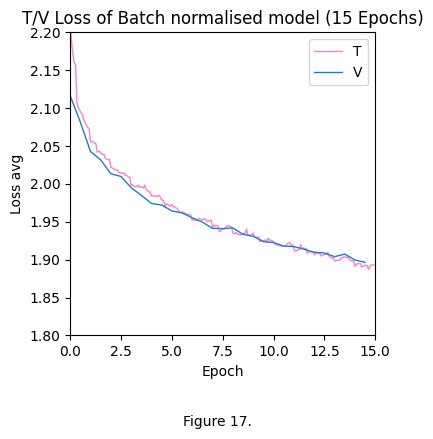

Test accuracy:54.806


In [24]:
import matplotlib.pyplot as plt

xt = []
for i in range(len(batch_t_loss)):
  xt.append(((i)/len(batch_t_loss))*15) #y axis = epochs
xv = []
for i in range(len(batch_v_loss)):
  xv.append(((i)/len(batch_v_loss))*15)

figWidth = 10.  # In cm
figHeight = 10. # In cm
fig = plt.figure(figsize=tuple(np.array((figWidth, figHeight))/2.54)); ax = plt.axes()

### Plot the data
plt.plot(xt, batch_t_loss,linewidth=1.0, color=[1, 0.5, 0.8], label='T')
plt.plot(xv, batch_v_loss,linewidth=1.0, color=[0.1, 0.5, 0.8], label='V')

### Label the axes
plt.xlabel("Epoch")
plt.ylabel("Loss avg")
plt.legend(loc='upper right')

### Add a title
plt.title("T/V Loss of Batch normalised model (15 Epochs)")
ax.set_ylim(ymin=1.8, ymax=2.2)
ax.set_xlim(xmin=0.0, xmax=15)
txt="Figure 17."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()
print(f'Test accuracy:{batch_test*100:.3f}')

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tdata_exp3, vdata_exp3 = torch.utils.data.random_split(trainset, [40000,10000])
tloader_exp3 = torch.utils.data.DataLoader(tdata_exp3, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
vloader_exp3 = torch.utils.data.DataLoader(vdata_exp3, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
def train_model_exp3(epochs, criterion, tloader, vloader, device, lr, seed, batch_size=batch_size, return_model=True, dropout=0.0, model=None):

  def calc_grad_m_std():
    m_std = []
    for layer in model.net:
      if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear): #ignore all other 'layers'
        layer_grads = []
        for param in layer.parameters():#do not add empty params
          layer_grads.append(param.grad.mean().item())
        m_std.append([np.mean(layer_grads), np.std(layer_grads)])
    return m_std

  torch.manual_seed(seed)
  if model is None:
    model = Dropout_Model(dropout)
  model.to(device)
  optimizer = optim.Adam(model.parameters(), lr=lr)
  train_ep_loss = []
  val_ep_loss = []
  layers_m_std_start = []
  layers_m_std_end = []

  for epoch in range(epochs):  # loop over the dataset multiple times
      step_loss = []
      running_loss = 0.0
      model.train()
      for i, data in enumerate(tloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          inputs = inputs.to(device)
          labels = labels.to(device)


          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)
          train_loss = criterion(outputs, labels)
          train_loss.backward()
          optimizer.step()

          # print statistics
          step_loss.append(train_loss.item())
          running_loss += train_loss.item()
          if i % 100 == 99:    # print every 100 batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
              running_loss = 0.0
              train_ep_loss.append(np.mean(step_loss))

              ###GET PARAM GRADIENTS
              if epoch == 0 and i < 500:  #first 5 episodes
                  layers_m_std_start.append(calc_grad_m_std())
              elif epoch == epochs-1 and len(tloader)-i <= 500: #last 5 episodes
                layers_m_std_end.append(calc_grad_m_std())

          if i % (np.round(len(tloader)/3)) == np.round(len(tloader)/3) - 1: #validation every 1/3 epochs
              train_ep_loss.append(np.array(step_loss).mean())
              step_loss = []
              model.eval()
              running_loss = 0.0
              validStep_loss = []
              for i, data in enumerate(vloader, 0):

                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)

                valid_loss = criterion(outputs, labels)
                validStep_loss.append(valid_loss.item())
                running_loss += valid_loss.item()
                if i % 100 == 99:    # print every 100 batches
                  print(f'[{epoch + 1}, {i + 1:5d}] Validation Loss: {running_loss / 100:.3f}')
                  running_loss = 0.0
              val_ep_loss.append(np.array(validStep_loss).mean())
              model.train()

      train_ep_loss.append(np.array(step_loss).mean())
      step_loss = []



  if return_model:
    return model, (train_ep_loss, val_ep_loss), (layers_m_std_start, layers_m_std_end), test_acc(model, testloader)
  else:
    return (train_ep_loss, val_ep_loss), (layers_m_std_start, layers_m_std_end), test_acc(model, testloader)

In [ ]:
test = train_model_exp3(1, criterion, tloader_exp3, vloader_exp3, device, 1e-4, i, return_model=False)
print(np.mean(test[1][1], axis=0))

In [ ]:
#GET GRADIENT FLOW OF NO DROPOUT MODEL
dict0d_gflow = {}
for i in range(5):
  dict0d_gflow[f'm{i+1}'] = train_model_exp3(15, criterion, tloader_exp3, vloader_exp3, device, 1e-4, i, return_model=False) #training model 5 times with different seeds

with open('exp3_0dgflow.pickle', 'wb') as picky:
  pickle.dump(dict0d_gflow, picky)

In [ ]:
#GET GRADIENT FLOW OF NO DROPOUT MODEL
dict01d_gflow = {}
for i in range(5):
  dict01d_gflow[f'm{i+1}'] = train_model_exp3(15, criterion, tloader_exp3, vloader_exp3, device, 1e-4, i, dropout=0.1, return_model=False) #training model 5 times with different seeds

with open('exp3_01dgflow.pickle', 'wb') as picky:
  pickle.dump(dict01d_gflow, picky)

In [21]:
def get_avg_grad(d):
  t = []
  v = []
  acc = []
  m_std_s = []
  m_std_e = []
  for key in d:
    t.append(d[key][0][0])
    v.append(d[key][0][1])
    m_std_s.append(np.mean(d[key][1][0], axis=0))
    m_std_e.append(np.mean(d[key][1][1], axis=0))
    acc.append(d[key][2])
  t = np.array(t).mean(axis=0)
  v = np.array(v).mean(axis=0)
  m_std_s = np.array(m_std_s).mean(axis=0)
  m_std_e = np.array(m_std_e).mean(axis=0)
  acc = np.mean(acc)
  return t, v, m_std_s, m_std_e, acc

In [ ]:
_, _, gflow0d_s, gflow0d_e, _ = get_avg_grad(dict0d_gflow)

_, _, gflow01d_s, gflow01d_e, _ = get_avg_grad(dict01d_gflow)

In [ ]:
m0d_s, std0d_s = np.split(gflow0d_s, 2, axis=1)
m0d_e, std0d_e = np.split(gflow0d_e, 2, axis=1)
m01d_s, std01d_s = np.split(gflow01d_s, 2, axis=1)
m01d_e, std01d_e = np.split(gflow01d_e, 2, axis=1)

In [ ]:
class BatchNorm_Model(nn.Module):
    def __init__(self):
        super(BatchNorm_Model, self).__init__()
        self.net = nn.Sequential(
        nn.Conv2d(3, 32, 5, padding='same'),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(),
        nn.MaxPool2d(2, 2),

        nn.Conv2d(32, 64, 3),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(),

        nn.Conv2d(64, 64, 3),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(),
        nn.MaxPool2d(2, 2),

        nn.Flatten(),
        nn.Linear(2304,512),
        nn.BatchNorm1d(512),
        nn.LeakyReLU(),
        nn.Linear(512, 10),
        nn.Softmax(1))

    def forward(self, x):
        for layer in self.net:
            x = layer(x)
        return x

In [ ]:
#GET GRADIENT FLOW OF NO DROPOUT MODEL
batch_dict = {}
for i in range(5):
  m = BatchNorm_Model()
  batch_dict[f'm{i+1}'] = train_model_exp3(15, criterion, tloader_exp3, vloader_exp3, device, 1e-4, i, return_model=False, model=m) #training model 5 times with different seeds

with open('exp3_batch_dict.pickle', 'wb') as picky:
  pickle.dump(batch_dict, picky)

In [19]:
with open('exp3_batch_dict.pickle', 'rb') as picky:
  batch_dict = pickle.load(picky)

In [22]:
batch_t_loss, batch_v_loss, batch_grad_s, batch_grad_e, batch_test = get_avg_grad(batch_dict)

In [23]:
batch_m_s, batch_std_s = np.split(batch_grad_s, 2, axis=1)
batch_m_e, batch_std_e = np.split(batch_grad_e, 2, axis=1)

# Conclusions and Discussion (instructions) - 25 MARKS <ignore>
In this section, you are expected to:
* briefly summarise and describe the conclusions from your experiments (8 MARKS).
* discuss whether or not your results are expected, providing scientific reasons (8 MARKS).
* discuss two or more alternative/additional methods that may enhance your model, with scientific reasons (4 MARKS).
* Reference two or more relevant academic publications that support your discussion. (4 MARKS)

Experiment 1 found that, out of the learning rates tested, 1e-4 returns the best performance. Furthermore, a learning rate scheduler that drops LR by 1e-5 every 15 epochs did not proved any significant improvement to the learning curve. This is is surprised considering the documented effectiveness of learning rate scheduling [15], particularly within convolutional neural networks. This could be due to the optimizer in use, which has been demonstrated to work well even without a scheduled learning rate. Another reason could be the gradient flow of the model, as the later layers' parameters have a very low mean gradient(>1e-10), as found in experiment 3. This could indicate that the learning rate scheduler would need to be more extreme to have any effect.<br><br>
In experiment 2, it was clear that dropout in the fully connected layers of the model had an adverse affect on its performance. Naturally, the best performing model that contained dropout had a dropout probability of 0.1, as that was the lowest. When that and the model without dropout were put to a transfer learning task, it also became clear that the dropout reduced generalisability in this case. This was unexpected due to this particular method of regularisation having well established success in reducing overfitting and increasing generalisability [16].<br><br>
The final experiment revealed that the model in this report suffered from the exploding gradient problem [17]. The mean and standard deviation of the gradients in the earlier layers were exponentially higher than the layers towards the end, both with and without dropout. Implementing batch normalisation did remedy this slightly, but it was still a prevalent problem. However, batch normalisation did have a positive effect on the learning curves of the model for both training and validation data. This was to be expected as batch normalisation has been proven to be a valuable method for generalisation [18].<br><br>
Despite the training being somewhat slow, the learning curves of the models did not seem to plateau, which could suggest that training for much more epochs (e.g. >100) could allow for better results to be achieved. Therefore the model could be improved by more training epochs.<br>
A further improvement could be made by adding more convlutional layers, as established image classifiers like AlexNet and ResNet have far deeper architectures, which allow them to learn more complex features.

# References (instructions) <ignore>
Use the cell below to add your references. A good format to use for references is like this:

[AB Name], [CD Name], [EF Name] ([year]), [Article title], [Journal/Conference Name] [volume], [page numbers] or [article number] or [doi]

Some examples:

JEM Bennett, A Phillipides, T Nowotny (2021), Learning with reinforcement prediction errors in a model of the Drosophila mushroom body, Nat. Comms 12:2569, doi: 10.1038/s41467-021-22592-4

SO Kaba, AK Mondal, Y Zhang, Y Bengio, S Ravanbakhsh (2023), Proc. 40th Int. Conf. Machine Learning, 15546-15566

#<ignore>
[1] Chauhan, R., Ghanshala, K. K., & Joshi, R. C. (2018, December). Convolutional neural network (CNN) for image detection and recognition. In *2018 first international conference on secure cyber computing and communication* (ICSCCC) (pp. 278-282). IEEE.<br><br>
[2]Apicella, A., Donnarumma, F., Isgrò, F., & Prevete, R. (2021). A survey on modern trainable activation functions. *Neural Networks*, 138, 14-32.<br><br>
[3]Baldi, P., & Sadowski, P. J. (2013). Understanding dropout. *Advances in neural information processing systems*, 26<br><br>
[4]Krizhevsky, A., & Hinton, G. (2010). Convolutional deep belief networks on cifar-10. Unpublished manuscript, 40(7), 1-9.<br><br>
[5]Ho-Phuoc, T. (2018). CIFAR10 to compare visual recognition performance between deep neural networks and humans. *arXiv preprint arXiv:1811.07270*.<br><br>
[6]Radiuk, P. M. (2017). Impact of training set batch size on the performance of convolutional neural networks for diverse datasets. *Information Technology and Management Science*, 20(1), 20-24.<br><br>
[7]Deng, J., Dong, W., Socher, R., Li, L. J., Li, K., & Fei-Fei, L. (2009, June). Imagenet: A large-scale hierarchical image database. In *2009 IEEE conference on computer vision and pattern recognition* (pp. 248-255). Ieee.<br><br>
[8]Pal, K. K., & Sudeep, K. S. (2016, May). Preprocessing for image classification by convolutional neural networks. In *2016 IEEE International Conference on Recent Trends in Electronics, Information & Communication Technology (RTEICT)* (pp. 1778-1781). IEEE.
<br><br>
[9]Zhang, Z., & Sabuncu, M. (2018). Generalized cross entropy loss for training deep neural networks with noisy labels. *Advances in neural information processing systems*, 31.<br><br>
[10]Kurbiel, T., & Khaleghian, S. (2017). Training of deep neural networks based on distance measures using RMSProp. *arXiv preprint arXiv:1708.01911.*<br><br>
[11]Kandel, I., Castelli, M., & Popovič, A. (2020). Comparative study of first order optimizers for image classification using convolutional neural networks on histopathology images. *Journal of imaging*, 6(9), 92.<br><br>
[12]Khanday, O. M., Dadvandipour, S., & Lone, M. A. (2021). Effect of filter sizes on image classification in CNN: A case study on CFIR10 and fashion-MNIST datasets. *IAES International Journal of Artificial Intelligence*, 10(4), 872.<br><br>
[13]Wiranata, A., Wibowo, S. A., Patmasari, R., Rahmania, R., & Mayasari, R. (2018, December). Investigation of padding schemes for faster R-CNN on vehicle detection. *In 2018 International Conference on Control, Electronics, Renewable Energy and Communications* (ICCEREC) (pp. 208-212). IEEE.<br><br>
[14]Xiao, H., Rasul, K., & Vollgraf, R. (2017). Fashion-mnist: a novel image dataset for benchmarking machine learning algorithms. *arXiv preprint arXiv:1708.07747*.<br><br>
[15]Darken, C., Chang, J., & Moody, J. (1992, August). Learning rate schedules for faster stochastic gradient search. In *Neural networks for signal processing* (Vol. 2, pp. 3-12). Helsinoger, Denmark: Citeseer.<br><br>
[16]Srivastava, N. (2013). Improving neural networks with dropout. *University of Toronto*, 182(566), 7.<br><br>
[17]Philipp, G., Song, D., & Carbonell, J. G. (2017). The exploding gradient problem demystified-definition, prevalence, impact, origin, tradeoffs, and solutions. *arXiv preprint arXiv:1712.05577*.<br><br>
[18]Santurkar, S., Tsipras, D., Ilyas, A., & Madry, A. (2018). How does batch normalization help optimization?. *Advances in neural information processing systems*, 31.<br><br>
[19]O'shea, K., & Nash, R. (2015). An introduction to convolutional neural networks. *arXiv preprint arXiv:1511.08458*.